<a href="https://colab.research.google.com/github/pra1608/Risk-Analysis/blob/master/ME780Examques2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC



In [202]:
df = pd.read_csv('/content/drive/MyDrive/ME780Exam/New folder/193109012@iitb.ac.in_Q2.csv')

In [203]:
X = df[df.columns[:-1].values].values
y = df[df.columns[-1]].values.reshape(-1,1)

In [229]:
df[df.columns[-1]].unique().tolist()

[4.0, 3.0, 2.0, 1.0, 0.0]

(-3.2077855443457866,
 3.1322144556542186,
 -3.3721728612110042,
 3.1078271387890015)

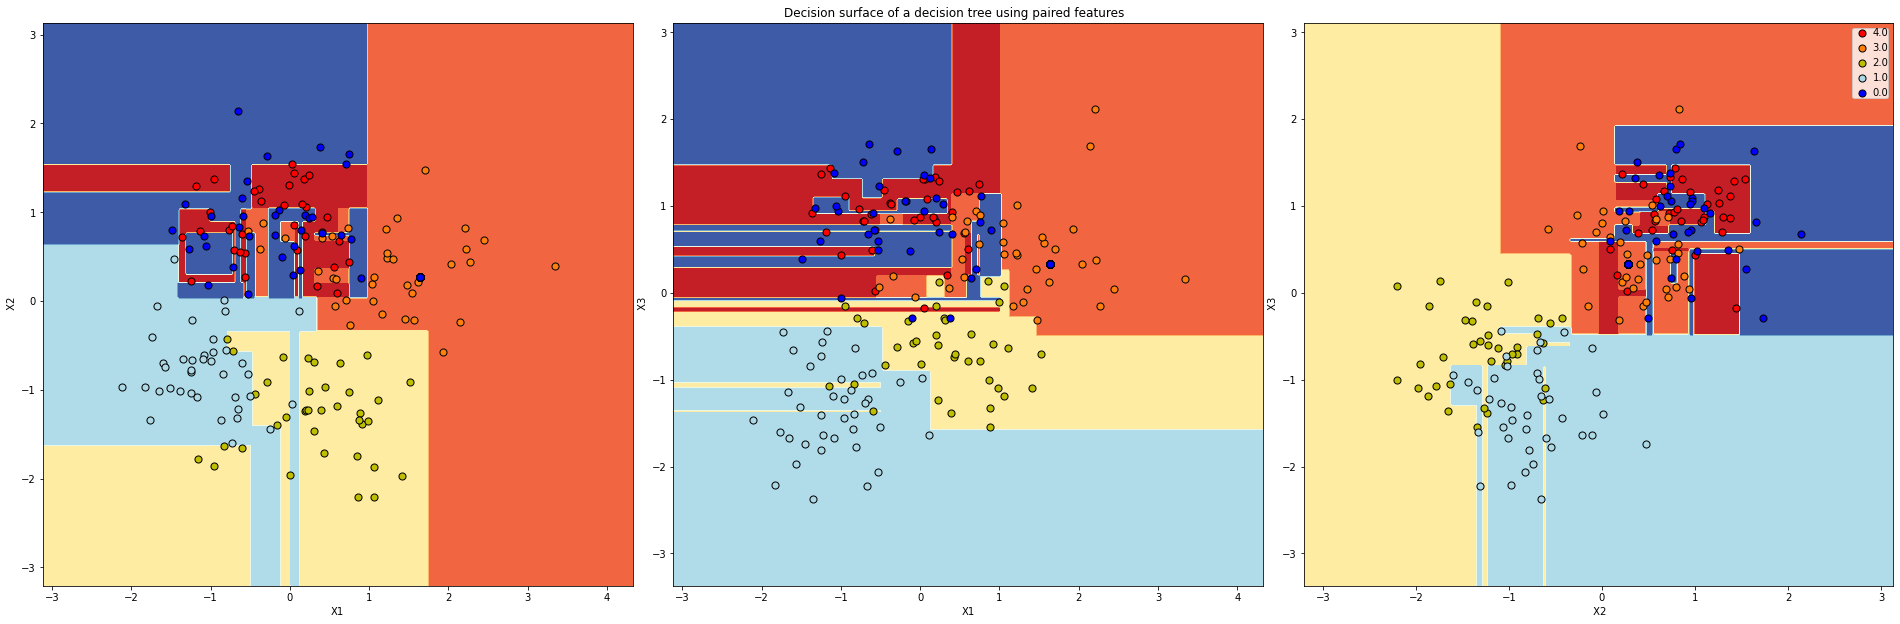

In [238]:
n_classes = len(df[df.columns[-1]].unique())
plot_colors =  ['r', '#ff7f0e', 'y', '#ADD8E6', 'b']
plot_step = 0.02
X1 = df[df.columns[:-1].values].values
y1 = df[df.columns[-1]].values.reshape(-1,1)
X1 = StandardScaler().fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.1, random_state=42)
figure = plt.figure(figsize=(27, 9))
for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")


In [ ]:
figure = plt.figure(figsize=(18, 18))
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.show()

Confusion matrix, without normalization
[[4 1 0 0 1]
 [0 2 0 0 1]
 [0 0 2 1 0]
 [0 0 0 2 0]
 [2 2 0 0 2]]
Normalized confusion matrix
[[0.67 0.17 0.   0.   0.17]
 [0.   0.67 0.   0.   0.33]
 [0.   0.   0.67 0.33 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.33 0.33 0.   0.   0.33]]


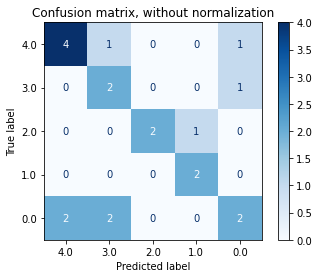

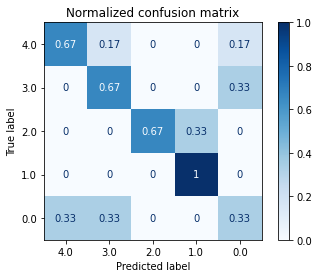

In [191]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

(-3.2077855443457866,
 3.1322144556542186,
 -3.3721728612110042,
 3.1078271387890015)

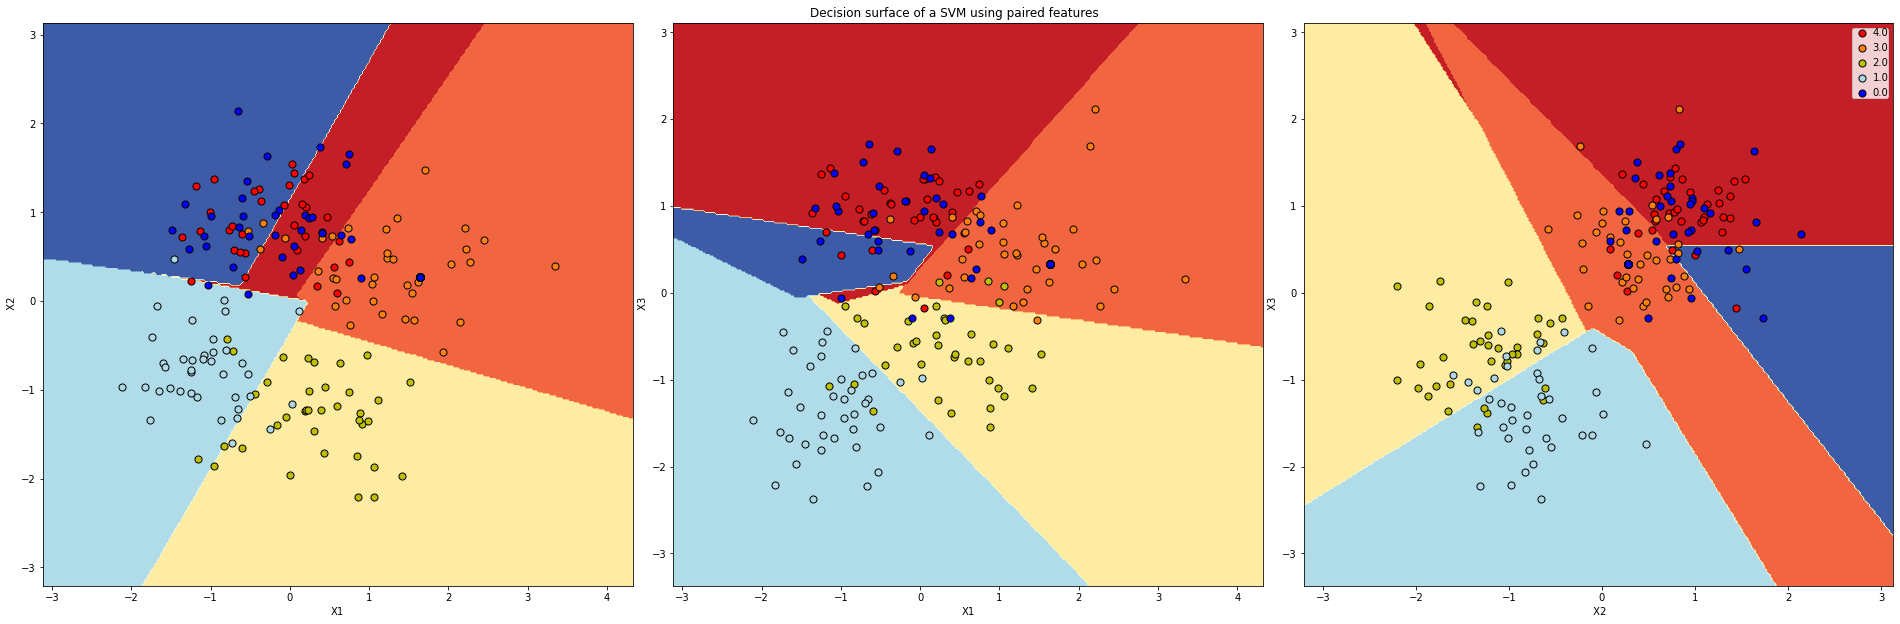

In [239]:
n_classes = len(df[df.columns[-1]].unique())
plot_colors =  ['r', '#ff7f0e', 'y', '#ADD8E6', 'b']
plot_step = 0.02
X1 = df[df.columns[:-1].values].values
y1 = df[df.columns[-1]].values.reshape(-1,1)
X1 = StandardScaler().fit_transform(X1)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.1, random_state=42)
figure = plt.figure(figsize=(27, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2],[1, 2]]):
    # We only take the two corresponding features
    X = X_train[:,pair]
    y = y_train

    # Train
    clf = SVC(C = 100,kernel = 'linear',gamma = 'auto').fit(X,y.ravel())

    # Plot the decision boundary
    plt.subplot(1, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(df.columns[:-1].values[pair[0]])
    plt.ylabel(df.columns[:-1].values[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], label=(df[df.columns[-1]].unique())[i],
                    cmap=plt.cm.RdYlBu, color = color,edgecolor='black', s=50)

plt.suptitle("Decision surface of a SVM using paired features")
plt.legend(loc='best', borderpad=0, handletextpad=0)
plt.axis("tight")


Confusion matrix, without normalization
[[4 0 0 0 2]
 [0 3 0 0 0]
 [0 0 2 1 0]
 [0 0 0 2 0]
 [1 1 0 0 4]]
Normalized confusion matrix
[[0.67 0.   0.   0.   0.33]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   0.67 0.33 0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.17 0.17 0.   0.   0.67]]


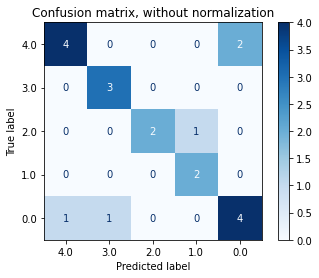

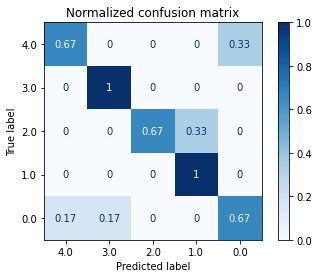

In [209]:
from sklearn.metrics import plot_confusion_matrix
clf = SVC(C = 10,kernel = 'linear',gamma = 'auto').fit(X_train,y_train.ravel())
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=(df[df.columns[-1]].unique()),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()